# Stock Price Prediction Using RandomForest 

#### Project Overview

In this project, we'll predict the price of stock market index.

Project Steps

> Create an initial machine learning model and estimate accuracy. 

> Build a backtesting engine to more accurately measure accuracy. 

> Improve the accuracy of the model. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Load Data

In [3]:
df = pd.read_csv("/stock_data.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close,Ticker
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644014,AAPL
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949755,AAPL
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952007,AAPL
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287870,AAPL
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221066,AAPL
...,...,...,...,...,...,...,...,...
22573,2019-12-24,153.009995,150.020004,150.630005,151.820007,1008000.0,151.820007,SPOT
22574,2019-12-26,153.179993,151.050003,151.889999,152.520004,752700.0,152.520004,SPOT
22575,2019-12-27,154.000000,152.509995,152.619995,153.169998,920700.0,153.169998,SPOT
22576,2019-12-30,153.490005,149.669998,153.179993,149.809998,1038100.0,149.809998,SPOT


### Cleaning and Visualizing Data

In [4]:
df = df.drop(columns=["Ticker"], axis=1)

In [5]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,22578.000000,22578.000000,22578.000000,22578.000000,2.257800e+04,22578.000000
mean,61.702842,60.249233,61.002670,61.000491,3.841013e+07,59.077680
std,61.063024,59.408639,60.286202,60.267345,4.587888e+07,60.814113
min,1.690000,1.610000,1.620000,1.620000,0.000000e+00,1.620000
25%,26.100000,25.292500,25.708125,25.682500,1.332768e+07,23.147940
50%,41.805000,41.000000,41.411499,41.419998,2.219880e+07,38.097876
75%,73.710001,72.257502,72.997499,73.086498,4.336898e+07,71.349375
max,423.209991,413.079987,421.380005,418.970001,6.488252e+08,418.970001


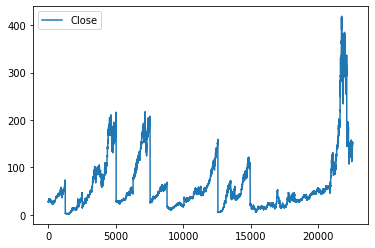

In [7]:
df.plot.line(y="Close", use_index=True)

In [8]:
# Setting up our target variable for machine learning. Will the price go up or down tomorrow?

df["Tomorrow"] = df["Close"].shift(-1)
df

,Date,High,Low,Open,Close,Volume,Adj Close,Tomorrow
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644014,26.562500
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949755,26.565001
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952007,26.937500
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287870,27.972500
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221066,28.002501
...,...,...,...,...,...,...,...,...
22573,2019-12-24,153.009995,150.020004,150.630005,151.820007,1008000.0,151.820007,152.520004
22574,2019-12-26,153.179993,151.050003,151.889999,152.520004,752700.0,152.520004,153.169998
22575,2019-12-27,154.000000,152.509995,152.619995,153.169998,920700.0,153.169998,149.809998
22576,2019-12-30,153.490005,149.669998,153.179993,149.809998,1038100.0,149.809998,149.550003


In [9]:
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
df

,Date,High,Low,Open,Close,Volume,Adj Close,Tomorrow,Target
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644014,26.562500,0
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949755,26.565001,1
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952007,26.937500,1
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287870,27.972500,1
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221066,28.002501,1
...,...,...,...,...,...,...,...,...,...
22573,2019-12-24,153.009995,150.020004,150.630005,151.820007,1008000.0,151.820007,152.520004,1
22574,2019-12-26,153.179993,151.050003,151.889999,152.520004,752700.0,152.520004,153.169998,1
22575,2019-12-27,154.000000,152.509995,152.619995,153.169998,920700.0,153.169998,149.809998,0
22576,2019-12-30,153.490005,149.669998,153.179993,149.809998,1038100.0,149.809998,149.550003,0


In [10]:
# Measuring only data from 2017 upward 
# df = df.loc["2017-01-01":].copy()

### Training Model 

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

### Measure Performance 

In [12]:
# Precision score saying what percent of time the actual price will go up or down. 

from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)
print('Precision score is', precision_score(test["Target"], preds))

Precision score is 0.425


### Model Improvement 

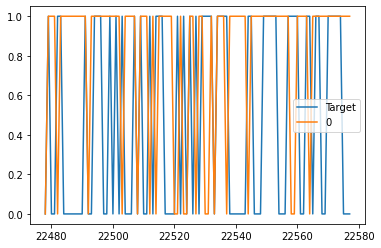

In [13]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [14]:
# Building a backtesting system 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [15]:
def backtest(df, model, predictors, start=750, step=250):
    all_predictions = []

    for i in range(start, df.shape[0], step):
        train = df.iloc[0:i].copy()
        test = df.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [16]:
predictions = backtest(df, model, predictors)

In [18]:
predictions["Predictions"].value_counts()

1    13291
0     8537
Name: Predictions, dtype: int64

In [20]:
# New precision score 

print('Precision score is', precision_score(predictions["Target"], predictions["Predictions"]))

Precision score is 0.5188473403054699


In [21]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.520112
0    0.479888
Name: Target, dtype: float64

In [28]:
# Creating variety of rolling avg 

horizons = [2,5,60,250,500]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df .shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [23]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_500,Trend_500
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644014,26.562500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949755,26.565001,1,0.985713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952007,26.937500,1,1.000047,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287870,27.972500,1,1.006962,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221066,28.002501,1,1.018849,2.0,1.033187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22573,2019-12-24,153.009995,150.020004,150.630005,151.820007,1008000.0,151.820007,152.520004,1,1.004632,2.0,1.007967,3.0,1.113076,33.0,1.101595,134.0,0.910525,266.0
22574,2019-12-26,153.179993,151.050003,151.889999,152.520004,752700.0,152.520004,153.169998,1,1.002300,2.0,1.010401,4.0,1.112769,34.0,1.105379,135.0,0.915992,267.0
22575,2019-12-27,154.000000,152.509995,152.619995,153.169998,920700.0,153.169998,149.809998,0,1.002126,2.0,1.010036,5.0,1.112200,34.0,1.108815,135.0,0.921168,267.0
22576,2019-12-30,153.490005,149.669998,153.179993,149.809998,1038100.0,149.809998,149.550003,0,0.988910,1.0,0.988532,4.0,1.083216,33.0,1.083360,134.0,0.902296,266.0


In [24]:
df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])


### Final Model Improvement 

In [25]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [26]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    
    # Gettimg probability 
    preds = model.predict_proba(test[predictors])[:,1]  
    
    # Setting threshold
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [27]:
predictions = backtest(df, model, new_predictors)

In [29]:
predictions["Predictions"].value_counts()

0.0    18727
1.0     2601
Name: Predictions, dtype: int64

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.526720492118416

In [31]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.519552
0    0.480448
Name: Target, dtype: float64

In [32]:
predictions

,Target,Predictions
1250,0,0.0
1251,1,0.0
1252,1,0.0
1253,1,0.0
1254,0,0.0
...,...,...
22573,1,0.0
22574,1,0.0
22575,0,0.0
22576,0,0.0
